Gemini Sky Background data  
(http://www.gemini.edu/sciops/ObsProcess/obsConstraints/atm-models/skybg_50_10.dat)

sky background 0.3-1.0um

DARK optical sky - 50%ile conditions (day 7)

AM=1.0

derived from (reverse engineered ESO model) sky spectrum plus constant slope to match assumed photometric background (from von Hippel model.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def getBackground(start,end):
    wavelength = []
    flux = []
    with open('/Users/deblokhorst/Documents/Dragonfly/DragonflyHalpha/Notebooks/Gemini_skybackground.dat','r') as f:
        for line in f:
            if line[0]!='#' and len(line)>5:
                tmp = line.split()
                wavelength.append(tmp[0])
                flux.append(tmp[1])
                
    wavelength = np.array(wavelength,'d')
    flux = np.array(flux,'d')
    
    start_ind = (np.abs(wavelength-start)).argmin()
    end_ind   = (np.abs(wavelength-end)).argmin()
    
    # since spacings are even, can just take the average of the flux array and times it by the total bandwidth
    # return np.mean(flux[start_ind:end_ind])*(wavelength[end_ind]-wavelength[start_ind])    
    return wavelength[start_ind:end_ind],flux[start_ind:end_ind]

In [3]:
def getBackgroundMean(start,end):
    wavelength = []
    flux = []
    with open('/Users/deblokhorst/Documents/Dragonfly/DragonflyHalpha/Notebooks/Gemini_skybackground.dat','r') as f:
        for line in f:
            if line[0]!='#' and len(line)>5:
                tmp = line.split()
                wavelength.append(tmp[0])
                flux.append(tmp[1])
                
    wavelength = np.array(wavelength,'d')
    flux = np.array(flux,'d')
    
    start_ind = (np.abs(wavelength-start)).argmin()
    end_ind   = (np.abs(wavelength-end)).argmin()
    
    total=0
    for index in np.arange(start_ind,end_ind):
        total = total + (flux[index]*(wavelength[index+1]-wavelength[index]))
    
    return total /(wavelength[end_ind]-wavelength[start_ind])

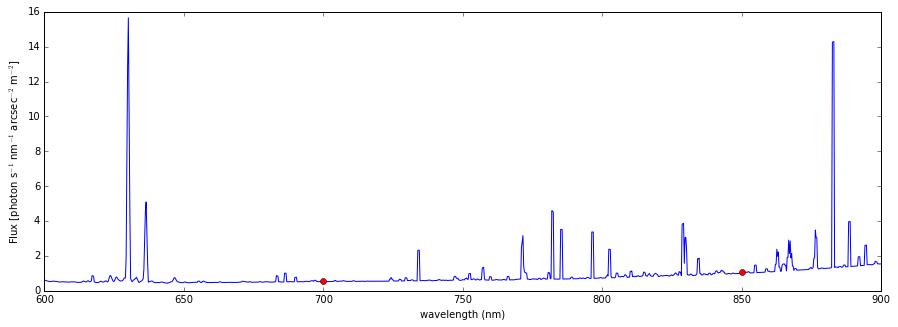

In [4]:
wavelength,flux=getBackground(600.,900.)
meanat700 = getBackgroundMean(690.,710.)
meanat850 = getBackgroundMean(840.,860.)

fig = plt.figure(figsize=(15.,5.))
plt.plot(wavelength, flux)
plt.plot(700,meanat700,'ro')
plt.plot(850,meanat850,'ro')
plt.ylabel(r'Flux [photon s$^{-1}$ nm$^{-1}$ arcsec$^{-2}$ m$^{-2}$]')
plt.xlabel('wavelength (nm)')

Want to compare the UVES and Gemini sky spectra.  To do this need to convert to the same units:  photon / s / cm^2 / arcsec^2 / nm.

Gemini is in: photon / s / **m^2** / arcsec^2 / nm

UVES is in: 1e-16 erg / s / cm^2 / arcsec^2 / **Angstrom**